<h1><center>TP 02. Linear regression and logistic regression</center></h1>  <center>______________________________________________________________________________________________________________</center>


##Exercice 1:

### **General algorithm of linear regression:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

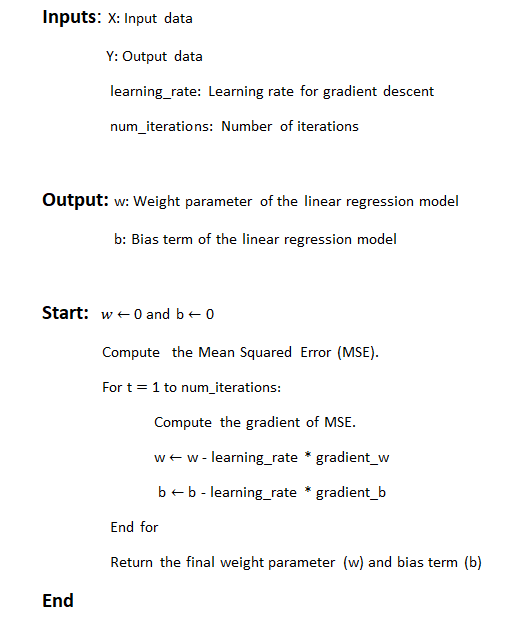


### **Implementation of linear regression:**

In [ ]:
def linear_regression_gradient_descent(X, Y, learning_rate, num_iterations):
    n = len(X)
    w = 0
    b = 0

    for _ in range(num_iterations):
        gradient_w, gradient_b = gradient_mse(X, Y, w, b)
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    return w, b

def MSE(X, Y, w, b):
    n = len(X)
    Y_pred = X * w + b
    squared_errors = (Y - Y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

def gradient_mse(X, Y, w, b):
    n = len(X)
    Y_pred = X * w + b
    gradient_w = (-2 / n) * np.sum(X * (Y - Y_pred))
    gradient_b = (-2 / n) * np.sum(Y - Y_pred)
    return gradient_w, gradient_b

### **Work on cars data:**

2.886896637102884 0.13138689645927348
Empirical Loss (MSE): 259.61203679892805


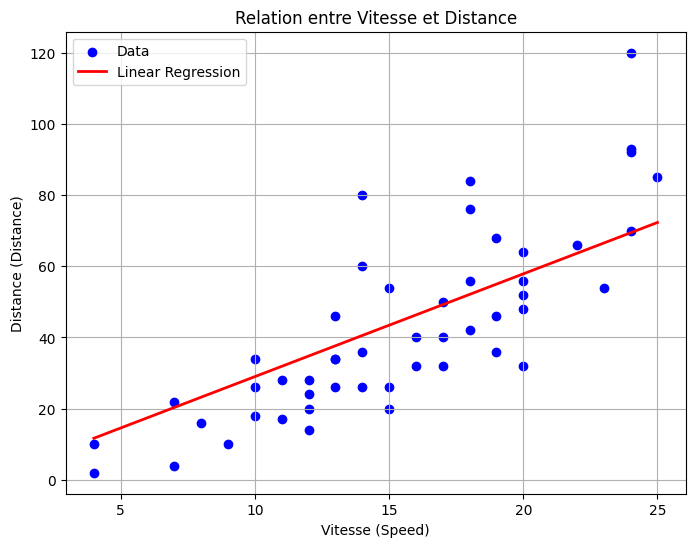

In [ ]:
import pandas as pd

data = pd.read_csv("/content/cars.csv")

plt.figure(figsize=(8, 6))
plt.scatter(data['speed'], data['dist'], c='blue', marker='o', label='Data')
plt.title('Relation entre Vitesse et Distance')
plt.xlabel('Vitesse (Speed)')
plt.ylabel('Distance (Distance)')

X = data['speed'].values
Y = data['dist'].values
n = len(X)

w, b = linear_regression_gradient_descent(X, Y, 0.00001, 1000)
print(w,b)
mse=MSE(X,Y,w,b)
print(f"Empirical Loss (MSE): {mse}")

regression_line = w * X + b

plt.plot(X, regression_line, color='red', linewidth=2, label='Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


**Comments:**We notice that the linear regression algorithm gives a quite big loss value since it uses the MSE as
loss function, and since the data is relatively dispersed in the 2D plan, this algorithm is sensitive to
outliers.

##**Real distance vs Estimated distance:**

We made a list with different learning rates and number of iterations to find the best parameters to have the optimal regression line to visualize the difference between real and estimated distance with respect to the speed.

<ipython-input-3-081f9834c316>:10: RuntimeWarning: invalid value encountered in double_scalars
  w -= learning_rate * gradient_w


Empirical Loss (MSE): 231.20932906434118


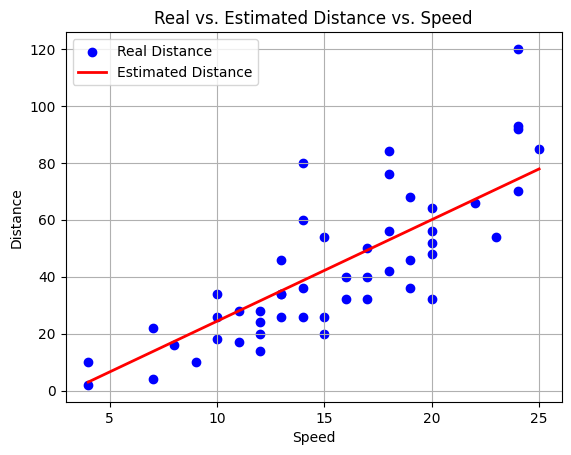

In [ ]:
learning_rates = [0.1, 0.01, 0.001]
num_iterations = [1000, 2000, 5000]

best_mse = float('inf')
best_w = None
best_b = None

for lr in learning_rates:
    for it in num_iterations:
        w, b = linear_regression_gradient_descent(X, Y, lr, it)
        mse = MSE(X, Y, w, b)

        if mse < best_mse:
            best_mse = mse
            best_w = w
            best_b = b

estimated_distance = best_w * X + best_b
plt.scatter(X, Y, c='blue', marker='o', label='Real Distance')
plt.plot(X, estimated_distance, color='red', linewidth=2, label='Estimated Distance')
mse=MSE(X,Y,w,b)
print(f"Empirical Loss (MSE): {mse}")

plt.title('Real vs. Estimated Distance vs. Speed')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

We found the best regression line but the empirical loss is still high which confirms what we said before.

# EXERCICE 2:

**A general algorithm for logistic regression**

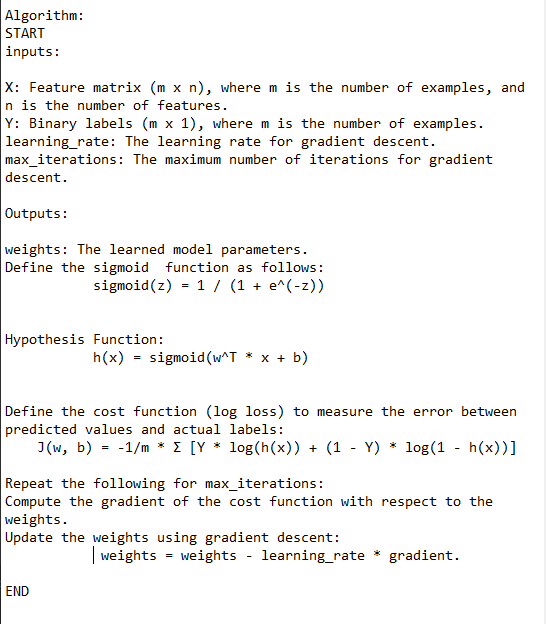

**We consider a problem of predicting whether a student succeed or not based of his GPA and GRE**.

**For this problem, use the provided csv file named binary**

# 1st case Initialize weights with zeros

Optimal Parameters:
w0: -0.018023995383553797
w1: 0.008440146560196128
w2: 0.008152724443459146
Empirical Loss: 89.36569212222955


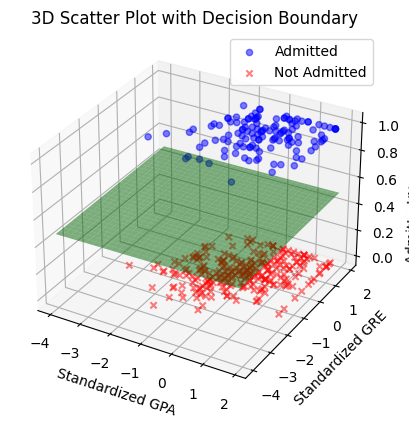

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def gradientdec(X, Y, w):
  n = len(X)
  subgrad = np.zeros_like(w)
  for i in range(n):
      prediction = sigmoid(np.dot(w, X[i]))
      subgrad += (prediction - Y[i]) * X[i]
  return subgrad / n

def logistic_regression(X, Y, w, delta=0.2, max_iterations=1000):
  n, t = len(X), 0
  lr = 0.0001
  prev_loss = float('inf')
  convergence_threshold = 1e-6
  while t < max_iterations:
      gradient = gradientdec(X, Y, w)
      w -= lr * gradient

      loss = -np.sum(Y * np.log(sigmoid(np.dot(X, w))) + (1 - Y) * np.log(1 - sigmoid(np.dot(X, w))) / n)

      if abs(prev_loss - loss) < convergence_threshold:
          break

      prev_loss = loss
      t += 1

  return w, t, loss

# Load the dataset
data = pd.read_csv("binary.csv")
X = data.iloc[:, 1:3].values
Y = data.iloc[:, 0].values


mean_GPA, std_GPA = np.mean(X[:, 0]), np.std(X[:, 0])
mean_GRE, std_GRE = np.mean(X[:, 1]), np.std(X[:, 1])
X[:, 0] = (X[:, 0] - mean_GPA) / std_GPA
X[:, 1] = (X[:, 1] - mean_GRE) / std_GRE

X = np.column_stack((np.ones(len(X)), X))

num_epochs = 1000
learning_rate = 0.01

# Initialize weights with zeros
w_initial = np.zeros(3)

w_optimized, _, loss = logistic_regression(X, Y, w_initial, max_iterations=num_epochs)
# Print the optimal set of parameters
print("Optimal Parameters:")
print("w0:", w_optimized[0])
print("w1:", w_optimized[1])
print("w2:", w_optimized[2])

# Print the empirical loss
print("Empirical Loss:", loss)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

admitted = X[Y == 1]
not_admitted = X[Y == 0]


ax.scatter(admitted[:, 1], admitted[:, 2], 1, label='Admitted', c='blue', marker='o', alpha=0.5)

ax.scatter(not_admitted[:, 1], not_admitted[:, 2], 0, label='Not Admitted', c='red', marker='x', alpha=0.5)

x_range = np.arange(-4, 2, 0.1)
y_range = np.arange(-4, 2, 0.1)
x, y = np.meshgrid(x_range, y_range)

z = sigmoid(w_optimized[0] + w_optimized[1] * x + w_optimized[2] * y)

ax.plot_surface(x, y, z, color='green', alpha=0.5)

ax.set_xlabel('Standardized GPA')
ax.set_ylabel('Standardized GRE')
ax.set_zlabel('Admitted/Not Admitted')
plt.title('3D Scatter Plot with Decision Boundary')
plt.legend(loc='best')

plt.show()

# **2nd case :Random values from a uniform distribution**

Optimal Parameters:
w0: 0.40007931953389175
w1: 0.5815349758093498
w2: 0.5406542944133162
Empirical Loss: 61.51260592816109


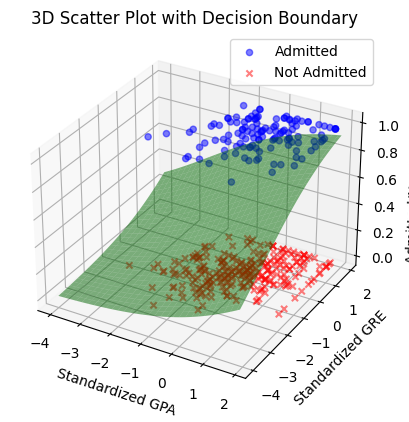

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def subgradient(X, Y, w):
    n = len(X)
    subgrad = np.zeros_like(w)
    for i in range(n):
        prediction = sigmoid(np.dot(w, X[i]))
        subgrad += (prediction - Y[i]) * X[i]
    return subgrad / n

def logistic_regression(X, Y, w, delta=0.2, max_iterations=1000):
    n, t = len(X), 0
    lr = 0.0001
    prev_loss = float('inf')
    convergence_threshold = 1e-6

    while t < max_iterations:
        gradient = subgradient(X, Y, w)
        w -= lr * gradient

        loss = -np.sum(Y * np.log(sigmoid(np.dot(X, w))) + (1 - Y) * np.log(1 - sigmoid(np.dot(X, w))) / n)

        if abs(prev_loss - loss) < convergence_threshold:
            break

        prev_loss = loss
        t += 1

    return w, t, loss

# Load the dataset
data = pd.read_csv("binary.csv")

X = data.iloc[:, 1:3].values
Y = data.iloc[:, 0].values

# Standardize the data
mean_GPA, std_GPA = np.mean(X[:, 0]), np.std(X[:, 0])
mean_GRE, std_GRE = np.mean(X[:, 1]), np.std(X[:, 1])
X[:, 0] = (X[:, 0] - mean_GPA) / std_GPA
X[:, 1] = (X[:, 1] - mean_GRE) / std_GRE

# Add a bias term
X = np.column_stack((np.ones(len(X)), X))


num_epochs = 1000
learning_rate = 0.01


# Random values from a uniform distribution

w_initial = np.random.uniform(-1, 1, 3)

# Perform logistic regression
w_optimized, _, loss_emp = logistic_regression(X, Y, w_initial, max_iterations=num_epochs)

# Print the optimal set of parameters
print("Optimal Parameters:")
print("w0:", w_optimized[0])
print("w1:", w_optimized[1])
print("w2:", w_optimized[2])

# Print the empirical loss
print("Empirical Loss:", loss_emp)

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate the data into admitted and not admitted
admitted = X[Y == 1]
not_admitted = X[Y == 0]

ax.scatter(admitted[:, 1], admitted[:, 2], 1, label='Admitted', c='blue', marker='o', alpha=0.5)

ax.scatter(not_admitted[:, 1], not_admitted[:, 2], 0, label='Not Admitted', c='red', marker='x', alpha=0.5)

x_range = np.arange(-4, 2, 0.1)
y_range = np.arange(-4, 2, 0.1)
x, y = np.meshgrid(x_range, y_range)

z = sigmoid(w_optimized[0] + w_optimized[1] * x + w_optimized[2] * y)

ax.plot_surface(x, y, z, color='green', alpha=0.5)

ax.set_xlabel('Standardized GPA')
ax.set_ylabel('Standardized GRE')
ax.set_zlabel('Admitted/Not Admitted')
plt.title('3D Scatter Plot with Decision Boundary')
plt.legend(loc='best')

plt.show()

# **3rd case :Random values from a chisquare distribution:**

Optimal Parameters:
w0: 3.430536410097178
w1: 8.848395802709717
w2: 0.6131082560459585
Empirical Loss: 164.7866194930178


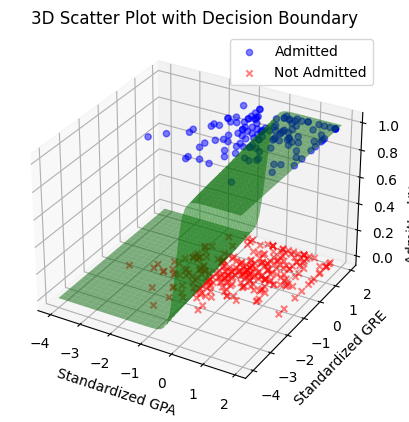

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradientdec(X, Y, w):
    n = len(X)
    subgrad = np.zeros_like(w)
    for i in range(n):
        prediction = sigmoid(np.dot(w, X[i]))
        subgrad += (prediction - Y[i]) * X[i]
    return subgrad / n

def logistic_regression(X, Y, w, delta=0.2, max_iterations=1000):
    n, t = len(X), 0
    lr = 0.0001
    prev_loss = float('inf')
    convergence_threshold = 1e-6

    while t < max_iterations:
        gradient = gradientdec(X, Y, w)
        w -= lr * gradient

        loss = -np.sum(Y * np.log(sigmoid(np.dot(X, w))) + (1 - Y) * np.log(1 - sigmoid(np.dot(X, w))) / n)

        if abs(prev_loss - loss) < convergence_threshold:
            break

        prev_loss = loss
        t += 1

    return w, t, loss

data = pd.read_csv("binary.csv")

X = data.iloc[:, 1:3].values
Y = data.iloc[:, 0].values

mean_GPA, std_GPA = np.mean(X[:, 0]), np.std(X[:, 0])
mean_GRE, std_GRE = np.mean(X[:, 1]), np.std(X[:, 1])
X[:, 0] = (X[:, 0] - mean_GPA) / std_GPA
X[:, 1] = (X[:, 1] - mean_GRE) / std_GRE

X = np.column_stack((np.ones(len(X)), X))

num_epochs = 1000
learning_rate = 0.01


# Random values from a chisquare distribution :
w_initial = np.random.chisquare(3, 3)


w_optimized, _, loss_emp = logistic_regression(X, Y, w_initial, max_iterations=num_epochs)


# Print the optimal set of parameters


print("Optimal Parameters:")
print("w0:", w_optimized[0])
print("w1:", w_optimized[1])
print("w2:", w_optimized[2])

# Print the empirical loss
print("Empirical Loss:", loss_emp)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

admitted = X[Y == 1]
not_admitted = X[Y == 0]

ax.scatter(admitted[:, 1], admitted[:, 2], 1, label='Admitted', c='blue', marker='o', alpha=0.5)

ax.scatter(not_admitted[:, 1], not_admitted[:, 2], 0, label='Not Admitted', c='red', marker='x', alpha=0.5)
x_range = np.arange(-4, 2, 0.1)
y_range = np.arange(-4, 2, 0.1)
x, y = np.meshgrid(x_range, y_range)

z = sigmoid(w_optimized[0] + w_optimized[1] * x + w_optimized[2] * y)

ax.plot_surface(x, y, z, color='green', alpha=0.5)

ax.set_xlabel('Standardized GPA')
ax.set_ylabel('Standardized GRE')
ax.set_zlabel('Admitted/Not Admitted')
plt.title('3D Scatter Plot with Decision Boundary')
plt.legend(loc='best')

plt.show()


**In logistic regression, the initial weights play a crucial role in the optimization process and model performance. Different initial weights can affect the speed of convergence, the potential for getting stuck in local minima, and the model's sensitivity to feature scale. It's important to find a balance between fast convergence and a solution that generalizes well. Robustness to initialization is desirable, and experiments with various initializations can help assess a model's behavior**

##EXERCICE 3:

This is a multidimensional linear regression. we modified our previous code by adding zeros to the initial weight and we added a regularization term to help with the convergence.

Our data features are:

- X1: Death rate per 1000 residents.
- X2: Doctor availability per 100,000 residents.
- X3: Hospital availability per 100,000 residents.
- X4: Annual per capital income in thousands of dollars.
- X5 : Population density people persquare mile

The results of model training were as follows:

In [ ]:
def linear_regression_gradient_descent(X, Y, learning_rate, num_iterations, reg_strength):
    n = len(X)
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(num_iterations):
        gradient_w, gradient_b = subgradient_mse(X, Y, w, b, reg_strength)
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    return w, b

def MSE(X, Y, w, b, reg_strength):
    n = len(X)
    Y_pred = np.dot(X, w) + b
    squared_errors = (Y - Y_pred) ** 2
    mse = np.mean(squared_errors) + reg_strength * np.sum(w ** 2)
    return mse

def subgradient_mse(X, Y, w, b, reg_strength):
    n = len(X)
    Y_pred = np.dot(X, w) + b
    subgradient_w = (-2 / n) * (np.dot(X.T, (Y - Y_pred)) + reg_strength * w)
    subgradient_b = (-2 / n) * np.sum(Y - Y_pred)
    return subgradient_w, subgradient_b

data = pd.read_csv("pop.csv")


X = data[['X1', 'X2', 'X3', 'X4']].values
Y = data['X5'].values

learning_rate = 0.0001
num_iterations = 1000
reg_strength = 0.001

previous_mse = float("inf")
convergence_threshold = 1e-5

for iteration in range(num_iterations):
    w, b = linear_regression_gradient_descent(X, Y, learning_rate, 1, reg_strength)
    mse = MSE(X, Y, w, b, reg_strength)

    if abs(previous_mse - mse) < convergence_threshold:
        break

    previous_mse = mse

print("Optimal weights (w):", w)
print("Bias (b):", b)



Optimal weights (w): [ 0.20164566  2.56197736 13.62576226  0.21008113]
Bias (b): 0.02212830188679245
